# Projeto 1 - Ciência dos dados
### Amanda Ades - Engenharia 2C

### Pergunta:
Nos paises que participam da OECD as mulheres tem mais autonomia e lugar no ambito economico e politico?

### Sumário:
- Imports e criação do DataFrame de estudo

- Analise das tres variaveis: "Media de anos escolares (mulher % homem, 25 até 34 anos)"; "Porcentagem de mulheres que trabalham no parlamento (mulher % total de pessoas no parlamento)";"Porcentagem de mulheres com trabalhos remunerados"

### Explicação da hipótese e mecanismo:
   
  A OECD (Organisation for Economic Co-operation and Development), é uma organização focada no desenvolvimento econômico  e bem estar social de um país. Portanto, ela é também defensora dos direitos iguais entre homens e mulheres, desta forma, para esta pesquisa,  dados de escolaridade, economia e política serão utilizadas para medir o nível de igualdade entre homens e mulheres. 
   
  Neste estudo os dados entre países que fazem parte da OECD  e que não fazem parte da OECD serão comparados. Então 3 variáveis serão utilizadas neste estudo, a primeira delas, a “Média de anos escolares (mulher % homem, 25 até 34 anos)”, que significa, a porcentagem de mulheres em relação a homens, que é muito relevante para este trabalho pois apresenta os níveis de desigualdade entre homens e mulheres no âmbito escolar. A segunda variável analisada será a “Porcentagem de mulheres que trabalham no parlamento (mulher % total de pessoas no parlamento)”, que reflete no espaço que as mulheres têm no âmbito político. E por fim, a terceira variável que será analisada será a “porcentagem de mulheres com trabalhos remunerados”, que representa quantas mulheres estão inseridas no mercado de trabalho e recebem salários.

   A minha hipótese para este trabalho é que nos países que fazem parte da OECD as mulheres terão mais visibilidade e com o passar dos anos ela aumentará já que uma das metas da organização é reduzir a desigualdade de gênero, que faz parte de desenvolver o país.

## Base de Dados utilizadas:
- Media de anos escolares (mulher % homem, 25 até 34 anos)
- Porcentagem de mulheres que trabalham no parlamento (mulher % total de pessoas no parlamento)
- Porcentagem de mulheres com trabalhos remunerados
https://www.gapminder.org/data/

### Imports e criação do DataFrame de estudo:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np
import seaborn as sn

Leitura das planilhas:

In [3]:

#Media de anos escolares (mulher % homem, 25 até 34 anos)
school = pd.read_excel('mean_school.xlsx')

#Porcentagem de mulheres que trabalham no parlamento (mulher % total de pessoas no parlamento)
parlament = pd.read_excel('parlament.xlsx')

#Porcentagem de mulheres com trabalhos remunerados
employed_women = pd.read_excel('employed_women.xlsx')

Adicionando a coluna OECD em uma das planilhas e colocando todos os valores como não primeiramente:

In [4]:
school.insert(0, "OECD", "não")

Adicionando sim nos paises que fazem parte da OECD em uma das planilhas para depois juntar com as outras:

In [5]:
school.loc[(school.country=="Austria") | (school.country=="Belgium")|(school.country=="Canada")| (school.country=="Denmark")|(school.country=="France")|(school.country=="Greece")|(school.country=="Iceland")|(school.country=="Ireland")|(school.country=="Italy")|(school.country=="Luxembourg")|(school.country=="The Netherlands")|(school.country=="Norway")|(school.country=="Portugal")|(school.country=="Spain")|(school.country=="Sweden")|(school.country=="Switzerland")|(school.country=="Turkey")|(school.country=="United Kingdom")|(school.country=="United States")|(school.country=="Germany")|(school.country=="Australia")|(school.country=="Finland")|(school.country=="Japan")|(school.country=="New Zeeland")|(school.country=="Chile")|(school.country=="Czech Republic")|(school.country=="Estonia")|(school.country=="Hungary")|(school.country=="Mexico")|(school.country=="Poland")|(school.country=="Slovakia")|(school.country=="South Korea"),['OECD']]='sim'

Novos dataframes que guardam somenete as informacões de 2005 até 2010:

In [6]:
school_2005_2010=school.loc[:,['OECD','country',2005,2006,2007,2008,2009,2010]]
parlament_2005_2010=parlament.loc[:,['country',2005,2006,2007,2008,2009,2010]]
employed_women_2005_2010=employed_women.loc[:,['country',2005,2006,2007,2008,2009,2010]]

Salvando a coluna de paises como um index:

In [7]:
S = school_2005_2010.set_index('country')
P = parlament_2005_2010.set_index('country')
E = employed_women_2005_2010.set_index('country')

Juntando as tres tabelas e colocando um sufixo representando a variavel em cada ano:

In [8]:
data=S.join(P, how='inner', lsuffix='_S', rsuffix='_P')
new = data.join(E, how='inner', rsuffix='_E')

Renomeando as colunas referentes a employement (colocando o sufixo de E):


In [9]:
new.rename(columns={2005: "2005_E", 2006:"2006_E", 2007:"2007_E",2008:"2008_E",2009:"2009_E",2010: "2010_E"}, inplace=True) 

Criando um novo dataframe somente com os paises que não fazem parte da OECD:

In [10]:
naoOECD=new[new.OECD == 'não']
simOECD=new[new.OECD=='sim']

Detalhes estatísticos basicos:

In [11]:
new.describe()

,2005_S,2006_S,2007_S,2008_S,2009_S,2010_S,2005_P,2006_P,2007_P,2008_P,2009_P,2010_P,2005_E,2006_E,2007_E,2008_E,2009_E,2010_E
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,158.000000,162.000000,162.000000,160.000000,159.000000,159.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,89.276471,89.594118,89.870588,90.171765,90.498235,90.817059,16.437342,16.585185,17.679012,17.901250,18.771069,18.742138,53.697429,54.005092,54.336969,54.580669,54.585466,54.722877
std,21.187948,21.071430,20.930886,20.802242,20.697121,20.595409,9.801751,9.978687,9.935246,10.400242,10.789530,10.691250,32.636941,32.563472,32.585191,32.671080,32.588762,32.488690
min,21.400000,21.500000,21.900000,22.200000,22.300000,22.600000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.924000,0.930000,0.936000,0.945000,0.954000,0.978000
25%,75.250000,76.000000,76.650000,77.400000,77.975000,78.600000,9.125000,8.725000,10.275000,10.000000,10.000000,10.350000,21.983500,22.867000,22.069000,21.783000,21.915500,21.837999
50%,99.800000,100.000000,100.000000,100.500000,101.000000,101.000000,14.250000,14.400000,16.400000,16.100000,17.800000,17.300000,58.261002,55.904999,56.681000,57.488998,58.210999,59.660999
75%,104.000000,104.000000,104.000000,104.000000,104.000000,105.000000,21.775000,22.075000,23.375000,23.750000,24.850000,24.300000,85.606998,86.134499,86.725502,86.954502,87.279999,87.429001
max,126.000000,126.000000,127.000000,126.000000,126.000000,126.000000,48.800000,48.800000,48.800000,56.300000,56.300000,56.300000,99.847000,99.682999,99.683998,99.617996,99.529999,99.445000


Arrumando os sufixos do database:

In [12]:

# Cria dataframe com apenas com os dados de school
newschool = new.loc[:, (new.columns == 'OECD') | (new.columns.str.endswith("_S"))]
# Remove o _S do final do nome das colunas do novo dataframe
newschool.columns = newschool.columns.str.rstrip('_S')

# Cria dataframe com apenas com os dados de parlament
newparlament = new.loc[:, (new.columns == 'OECD') | (new.columns.str.endswith("_P"))]
# Remove o _P do final do nome das colunas do novo dataframe
newparlament.columns = newparlament.columns.str.rstrip('_P')


# Cria dataframe com apenas com os dados de employement
newemployement = new.loc[:, (new.columns == 'OECD') | (new.columns.str.endswith("_E"))]
# Remove o _E do final do nome das colunas do novo dataframe
newemployement.columns = newemployement.columns.str.rstrip('_E')

### Análise das tres variáveis:

Para analisar os paises que fazem parte da OECD e os que não fazem parte da OECD em cada variável, eles serão dividos primeiramente por ano, e então, a média e a mediana serão calculadas.

In [13]:
# Calcula a media e faz a transposta
meanschool = newschool.groupby('OECD').mean().T
meanparlament = newparlament.groupby('OECD').mean().T
meanemployement = newemployement.groupby('OECD').mean().T

In [14]:
# Calcula a mediana e faz a transposta
medianschool = newschool.groupby('OECD').median().T
medianparlament = newparlament.groupby('OECD').median().T
medianemployement = newemployement.groupby('OECD').median().T

Com estes valores graficos de dispercao da média de cada variavel por ano serão criados:

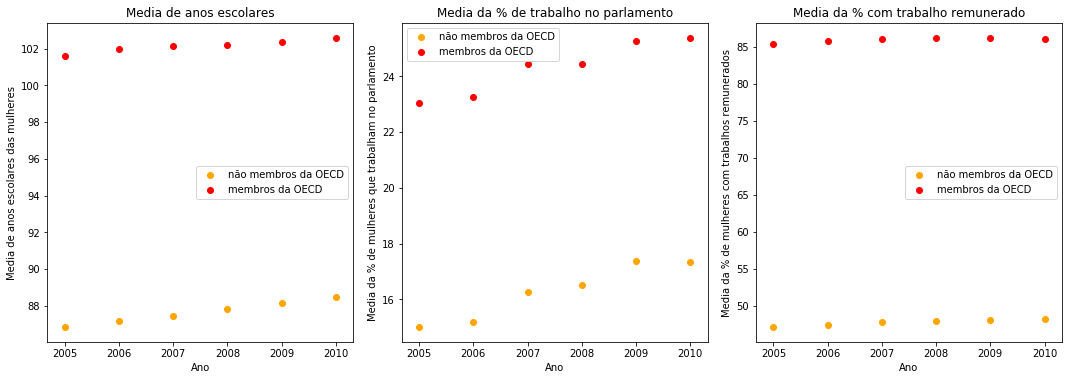

In [15]:
x=[2005,2006,2007,2008,2009,2010]

fig = plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.scatter(x,meanschool['não'],label='não membros da OECD', color='orange')
plt.scatter(x,meanschool['sim'],label='membros da OECD', color='red')
plt.title('Media de anos escolares')
plt.ylabel('Media de anos escolares das mulheres')
plt.xlabel('Ano')
plt.legend()

plt.subplot(332)
plt.scatter(x,meanparlament['não'],label='não membros da OECD', color='orange')
plt.scatter(x,meanparlament['sim'],label='membros da OECD', color='red')
plt.title('Media da % de trabalho no parlamento')
plt.ylabel('Media da % de mulheres que trabalham no parlamento')
plt.xlabel('Ano')
plt.legend()

plt.subplot(333)
plt.scatter(x,meanemployement['não'],label='não membros da OECD', color='orange')
plt.scatter(x,meanemployement['sim'],label='membros da OECD', color='red')
plt.title('Media da % com trabalho remunerado')
plt.ylabel('Media da % de mulheres com trabalhos remunerados')
plt.xlabel('Ano')
plt.legend()

plt.tight_layout()
plt.show()

Com estes valores graficos de dispercao da mediana de cada variavel por ano serão criados:

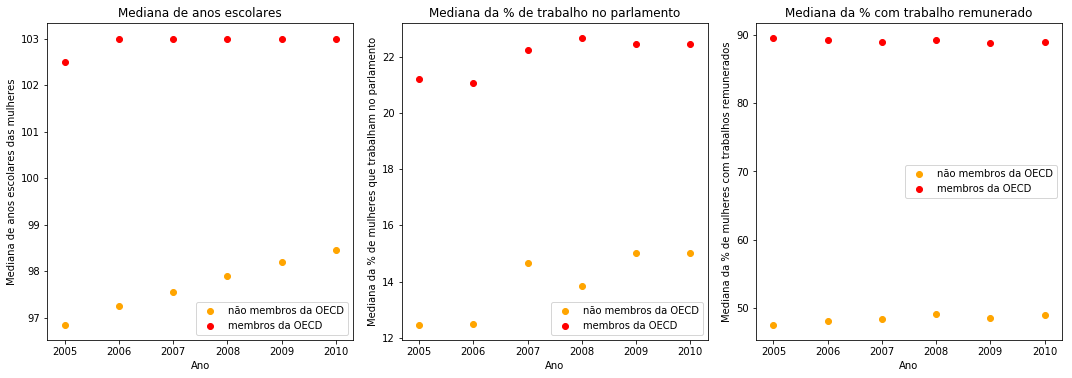

In [16]:
x=[2005,2006,2007,2008,2009,2010]

fig = plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.scatter(x,medianschool['não'],label='não membros da OECD', color='orange')
plt.scatter(x,medianschool['sim'],label='membros da OECD', color='red')
plt.title('Mediana de anos escolares')
plt.ylabel('Mediana de anos escolares das mulheres')
plt.xlabel('Ano')
plt.legend()

plt.subplot(332)
plt.scatter(x,medianparlament['não'],label='não membros da OECD', color='orange')
plt.scatter(x,medianparlament['sim'],label='membros da OECD', color='red')
plt.title('Mediana da % de trabalho no parlamento')
plt.ylabel('Mediana da % de mulheres que trabalham no parlamento')
plt.xlabel('Ano')
plt.legend()

plt.subplot(333)
plt.scatter(x,medianemployement['não'],label='não membros da OECD', color='orange')
plt.scatter(x,medianemployement['sim'],label='membros da OECD', color='red')
plt.title('Mediana da % com trabalho remunerado')
plt.ylabel('Mediana da % de mulheres com trabalhos remunerados')
plt.xlabel('Ano')
plt.legend()

plt.tight_layout()
plt.show()

Nestes gráficos pode se observar que em todas as variaveis os numeros são bem mais altos nos paises que são membros da OECD. Portanto, na variavel que compara a media de anos na escola, os numeros sao bem mais altos nos paises membros, na que compara a porcentagem de trabalho no parlamento a procentagem de é muito mais alta nos paises que não sao membros e o mesmo ocorre na variavel que compara a porcentagem de mulheres com trabalho remunerado. Porém, estes valores não sao suficientes para concluir que a OECD é realmente um fator que influencia essa diferenca de valores, varios outros fatores podem interfirir nisso, mas realmente, nos paises que são membros da OECD pode se enxergar uma diferenca no espaco das mulheres em relacao aos paises que não sao membros.

Com os valores calculados previamente, graficos de barra comparativos da média de cada variavel por ano serão criados:

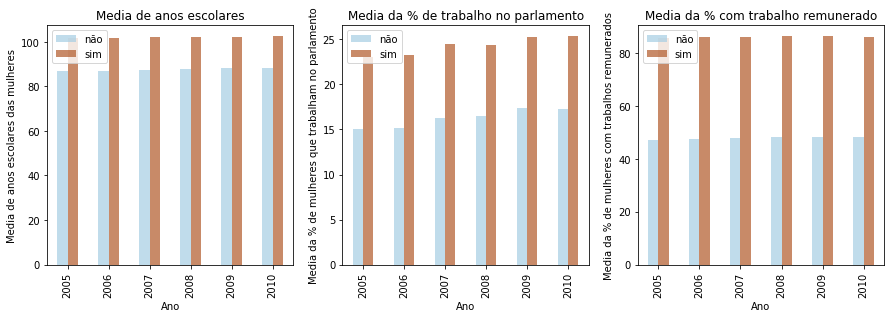

In [17]:
#Graficos  comparativos da media
fig = plt.figure(figsize=(15, 15))
ax1=fig.add_subplot(3,3,1)
meanschool.plot.bar(colormap='Paired', alpha = 0.7, ax=ax1)
plt.title('Media de anos escolares')
plt.ylabel('Media de anos escolares das mulheres')
plt.xlabel('Ano')
plt.legend()

ax2=fig.add_subplot(3,3,2)
meanparlament.plot.bar(colormap='Paired', alpha = 0.7,ax=ax2)
plt.title('Media da % de trabalho no parlamento')
plt.ylabel('Media da % de mulheres que trabalham no parlamento')
plt.xlabel('Ano')
plt.legend()

ax3=fig.add_subplot(3,3,3)
meanemployement.plot.bar(colormap='Paired', alpha = 0.7, ax=ax3)
plt.title('Media da % com trabalho remunerado')
plt.ylabel('Media da % de mulheres com trabalhos remunerados')
plt.xlabel('Ano')
plt.legend()
plt.show()

Com os valores calculados previamente, graficos de barra comparativos da mediana de cada variavel por ano serão criados:

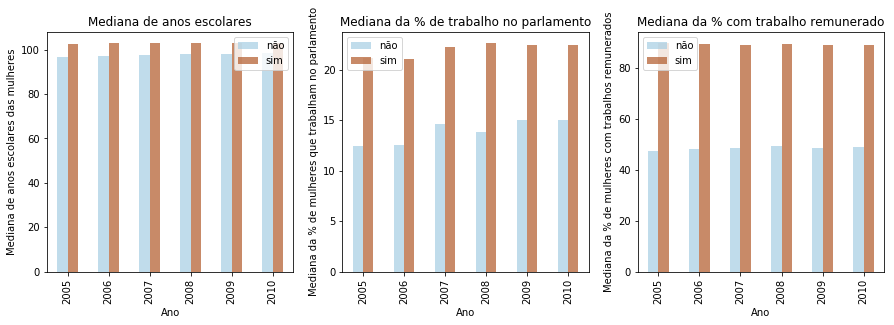

In [18]:
#Graficos  comparativos da mediana
fig = plt.figure(figsize=(15, 15))

ax1=fig.add_subplot(3,3,1)
medianschool.plot.bar(title = "Mediana por ano - School", colormap='Paired', alpha = 0.7, ax=ax1)
plt.title('Mediana de anos escolares')
plt.ylabel('Mediana de anos escolares das mulheres')
plt.xlabel('Ano')
plt.legend()


ax2=fig.add_subplot(3,3,2)
medianparlament.plot.bar(title = "Mediana por ano - Parlament", colormap='Paired', alpha = 0.7, ax=ax2)
plt.title('Mediana da % de trabalho no parlamento')
plt.ylabel('Mediana da % de mulheres que trabalham no parlamento')
plt.xlabel('Ano')
plt.legend()

ax3=fig.add_subplot(3,3,3)
medianemployement.plot.bar( title = "Mediana por ano - Employement", colormap='Paired', alpha = 0.7, ax=ax3)
plt.title('Mediana da % com trabalho remunerado')
plt.ylabel('Mediana da % de mulheres com trabalhos remunerados')
plt.xlabel('Ano')
plt.legend()
plt.show()

Criacao de boxplot entre os paises membros e não mebros da OECD e separados por ano e variavel para visualizar a distribuição e valores discrepantesdos dados:

<Figure size 1080x1080 with 0 Axes>

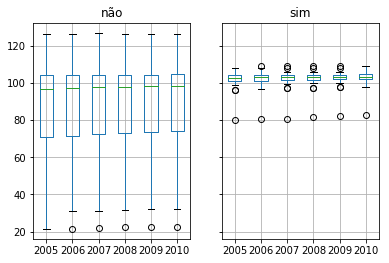

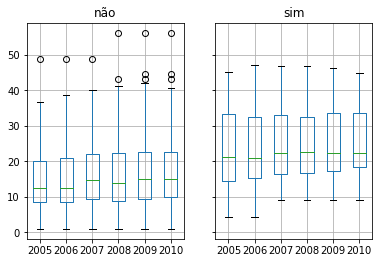

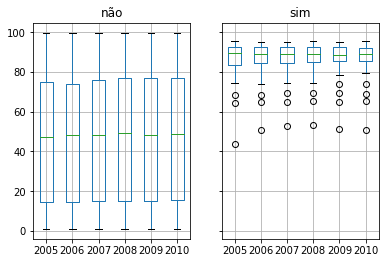

In [19]:
fig = plt.figure(figsize=(15, 15))
newschool.groupby('OECD').boxplot()
plt.show()
newparlament.groupby('OECD').boxplot()
plt.show()
newemployement.groupby('OECD').boxplot()
plt.show()

Comparacão das medias de dos membros da OECD durante os anos de 2005 a 2010 e comparacao das medias dos paises que não sao membros da OECD durante os anos de 2005 a 2010:

In [20]:
ms2005=meanschool.iloc[[0]]
ms2010=meanschool.iloc[[5]]
difs = (ms2010.values- ms2005.values)/ms2005*100
print(difs)

mp2005=meanparlament.iloc[[0]]
mp2010=meanparlament.iloc[[5]]
difp = (mp2010.values- mp2005.values)/mp2005*100
print(difp)

me2005=meanemployement.iloc[[0]]
me2010=meanemployement.iloc[[5]]
dife = (me2010.values- me2005.values)/ me2005*100
print(dife)

OECD       não       sim
2005  1.905689  0.945352
OECD        não        sim
2005  15.416749  10.023238
OECD       não       sim
2005  2.308625  0.848083


Comparacão das medianas de dos membros da OECD durante os anos de 2005 a 2010 e comparacao das medias dos paises que não sao membros da OECD durante os anos de 2005 a 2010:

In [21]:
mds2005=medianschool.iloc[[0]]
mds2010=medianschool.iloc[[5]]
difds = (mds2010.values- mds2005.values)/mds2005*100
print(difds)

mdp2005=medianparlament.iloc[[0]]
mdp2010=medianparlament.iloc[[5]]
difdp = (mp2010.values- mdp2005.values)/mdp2005*100
print(difdp)

mde2005=medianemployement.iloc[[0]]
mde2010=medianemployement.iloc[[5]]
difde = (mde2010.values- mde2005.values)/ mde2005*100
print(difde)

OECD       não       sim
2005  1.652039  0.487805
OECD        não        sim
2005  39.170422  19.642857
OECD      não       sim
2005  3.06204 -0.660729


Como pode ser visto nas duas ultimas tabelas, o crescimento percentual durante os anos de 2005 a 2010 das medias e das medianas foi maior nos paises que não sao membros da OECD do que nos paises membros da OECD. Porém, estes dados continuam insuficientes para chegar à alguma conclusão, então um o dataframe serà atualizado para incluir os dados da variacao. E com estes resultados, histogramas comparando cada pais serão criados para melhorar a analise.

In [22]:
newschool['var']=(newschool['2010']-newschool['2005'])/newschool['2005']*100
newparlament['var']=(newparlament['2010']-newparlament['2005'])/newparlament['2005']*100
newemployement['var']=(newemployement['2010']-newemployement['2005'])/newemployement['2005']*100

newschoolnão=newschool[newschool.OECD == 'não']
newschoolsim=newschool[newschool.OECD == 'sim']

newparlamentnão=newparlament[newparlament.OECD == 'não']
newparlamentsim=newparlament[newparlament.OECD == 'sim']

newemployementnão=newemployement[newemployement.OECD == 'não']
newemployementsim=newemployement[newemployement.OECD == 'sim']


C:\Users\Amanda Ades\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Amanda Ades\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Amanda Ades\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

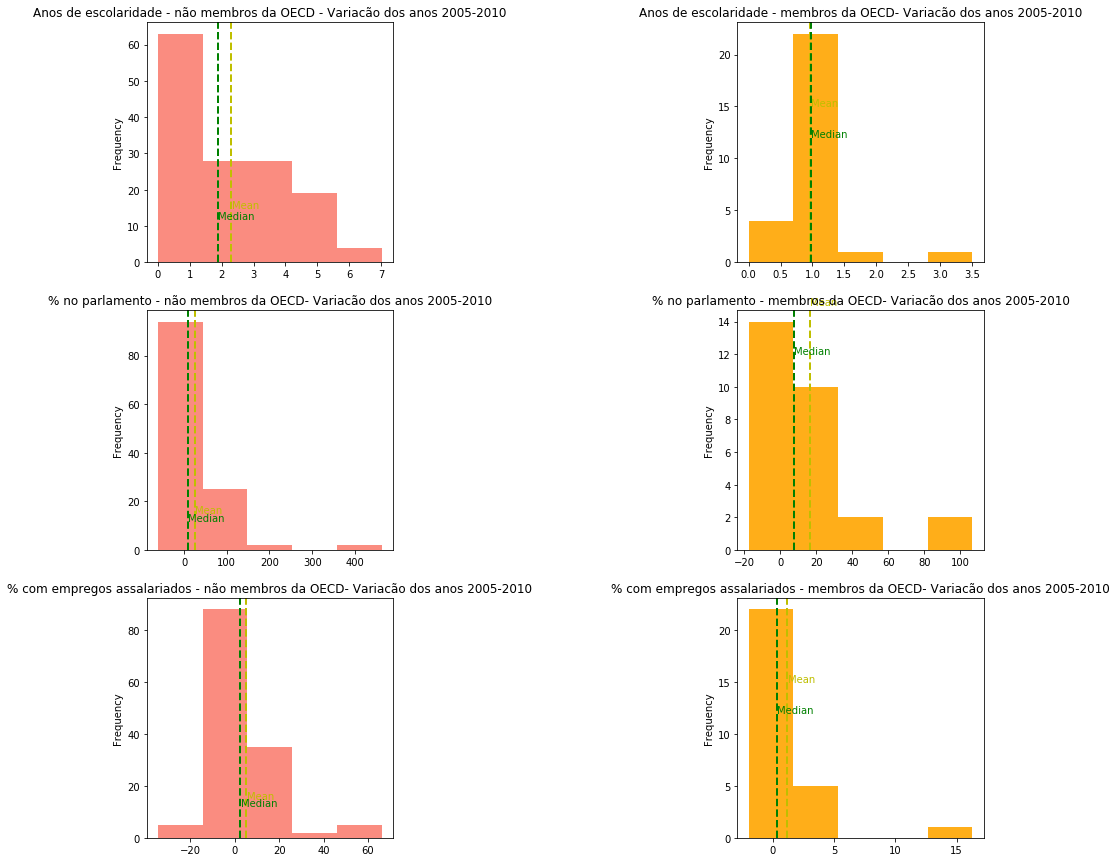

In [23]:
def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color) 

fig = plt.figure(figsize=(15, 15))
plt.subplot(331)
plot = newschoolnão['var'].plot.hist(bins=5, title='Anos de escolaridade - não membros da OECD - Variacão dos anos 2005-2010', alpha=0.9,color='salmon')
verticalLine(plot, newschoolnão['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newschoolnão['var'].median(), 12, "g", "Median")
plt.subplot(333)
plot = newschoolsim['var'].plot.hist(bins=5, title='Anos de escolaridade - membros da OECD- Variacão dos anos 2005-2010', alpha=0.9, color='orange')
verticalLine(plot, newschoolsim['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newschoolsim['var'].median(), 12, "g", "Median")


plt.subplot(334)
plot = newparlamentnão['var'].plot.hist(bins=5, title='% no parlamento - não membros da OECD- Variacão dos anos 2005-2010', alpha=0.9, color='salmon')
verticalLine(plot, newparlamentnão['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newparlamentnão['var'].median(), 12, "g", "Median")
plt.subplot(336)
plot = newparlamentsim['var'].plot.hist(bins=5, title='% no parlamento - membros da OECD- Variacão dos anos 2005-2010', alpha=0.9,color='orange')
verticalLine(plot, newparlamentsim['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newparlamentsim['var'].median(), 12, "g", "Median")


plt.subplot(337)
plot = newemployementnão['var'].plot.hist(bins=5, title='% com empregos assalariados - não membros da OECD- Variacão dos anos 2005-2010', alpha=0.9, color='salmon')
verticalLine(plot, newemployementnão['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newemployementnão['var'].median(), 12, "g", "Median")
plt.subplot(339)
plot = newemployementsim['var'].plot.hist(bins=5, title='% com empregos assalariados - membros da OECD- Variacão dos anos 2005-2010', alpha=0.9, color='orange')
verticalLine(plot, newemployementsim['var'].mean(), 15, "y", "Mean")
verticalLine(plot, newemployementsim['var'].median(), 12, "g", "Median")
plt.show()

Como pode ser visto nos graficos acima, a mediana esta sempre a direita da media, o que pode representar uma assimetria esquerda ou assimetria negativa. E como pode ser visto, os dados não estão tão concentrados no meio, o que pode mostrar que essa variacao dos anos 2005 a 2010 não é tão precisa quando generalizada entre a media e a mediana para a analise, ela esta mais espalhada para cada pais.

### Conclusão:

A partir de toda a analise feita, pode se concluir que de fato, nos paises que são membros da OECD as mulheres tem mais espaco nos tres campos, tanto no campo escolar, quanto politico e economico. Isso foi visto nos graficos de dispercao e de barra, onde os paises do grupo da OECD mostravam valores muito mais altos do que os paises que não pertenciam ao grupo. 

Porém, este resultado não pode ser atribuido somente a organizacao OECD, já que existem inumeras oitras variaveis que afetam o desenvolvimento do pais. Então, as tabelas que comparav a variacao ao longo dos anos foram feitas, e nelas pode se concluir que nos paises que não faziam parte da OECD as mulheres estavam ganhando mais espaco ao longo dos anos. Porém não se pode afirmar que a OECD não esta caminhando para seus objetivos de igualdade de genero somente porque nos paises que não sao membros o crescimetno é maior. Uma possibilidade para isso é que como os não membros já estavam com numeros muito mais baixos, com tanta influencia da globalizacao, eles foram influenciados a melhorar na igualdade de genero muito mais do que os paises membros.

Porém, respondendo a pergunta inicial, "Nos paises que participam da OECD as mulheres tem mais autonomia e lugar no ambito economico e politico?", sim, elas tem mais autonomia nesses campos, porém como foi mostrado nos graficos, isso não pode ser considerado somente ao fato deles fazerem parte da OECD, justamente pleo fato de nos outros paises as mulheres estarem recebendo mais autonomia.